# 1: Analyzing NYC Covid-19 Data and Fitting an Exponential Curve to the Case Numbers Test the Output of No Social Distancing

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nycdata = pd.read_csv('NYC data.csv')
nycdata
#reading in data file

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
0,3/2/2020,1,12,0
1,3/3/2020,4,10,0
2,3/4/2020,10,13,0
3,3/5/2020,2,17,0
4,3/6/2020,8,17,0
5,3/7/2020,14,9,0
6,3/8/2020,20,15,0
7,3/9/2020,54,36,0
8,3/10/2020,75,48,0
9,3/11/2020,157,72,1


In [98]:
cases = nycdata['Cases'] #turning cases data into readable array
cases_fit = cases[:16] #chosing section to fit the curve to
hospital = nycdata['Hospitalizations']
deaths = nycdata['Deaths']
x = np.linspace(1,43,43) #creating an x array for the data plot
x_fit = np.linspace(1,16,16) #x array for the fitted section

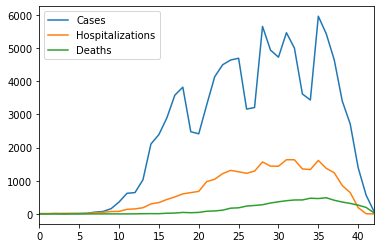

In [99]:
n = nycdata.plot() #plot of full data

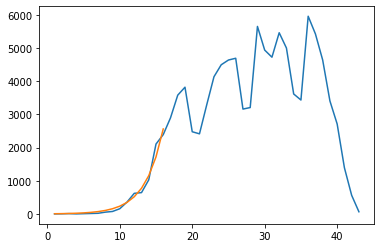

In [100]:
import scipy.optimize
def func(x_fit,a,b):
    return a*(b**x_fit) #exponential function to fit the curve to
popt,pcov = scipy.optimize.curve_fit(func,x_fit,cases_fit)
a_fit = popt[0] #a value
b_fit = popt[1] #b value
plt.plot(x,cases)
plt.plot(x_fit,func(x_fit,a_fit,b_fit))

In [101]:
xx = np.linspace(1,21,21) #looking at fit on larger area of true data
y = a_fit*(b_fit**xx)

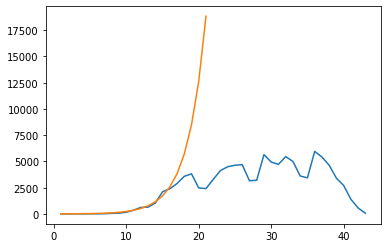

In [102]:
plt.plot(x,cases)
plt.plot(xx,func(xx,a_fit,b_fit))

In [172]:
#It it clear from the projection of the early exponential fit that social distancing practices were implemented to decrease 
#the cases numbers and flatten that curve. Without distancing, the cases would have kept skyrocketing exponentially. 

# 2: Implementing the SEIR Differential Models of Covid-19 Analysis

In [276]:
def rhs(z,t,p):
    S,E,I,R = z #solution vector of state variables
    rep, tinc, tinf = p #parameter vector
    f = [((-rep/tinf)*I*S),(((rep/tinf)*I*S) - (E/tinf)),((E/tinc)-(I/tinf)),(I/tinf)]
    return f
 #f is a function of our three differentials  

In [277]:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0 #reproduction number
tinc = 5.2 #incubation time
tinf = 2.9 #infection time
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]

In [278]:
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))

Text(0.5, 0, 'time')

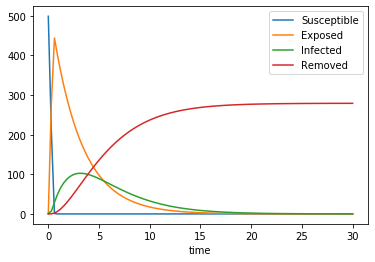

In [279]:
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [280]:
#This is one example with initial parameters of a 3.0 reproduction rate per day, a 5.2 day incubation period and a 2.9 day 
#infectious period, which were taken from Wuhan in the Kucharski et al paper. Although it mentions dividing by population in
# the first two differentials in the paper, that is because a number of other parameters wree involved in the paper with influx
# of population it does not work without those (which is why the website left that factor out, and we decided to follow it). 
#Originally, the initial infectious number was set to 1 person, 0 were exposed, and the rest of the populartion was
# susceptible, the other 499. What happens if any of these conditions are changed?

Text(0.5, 0, 'time')

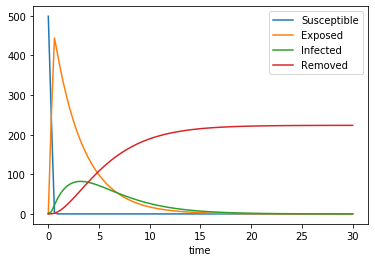

In [281]:
#Changing the incubation:
#raising the incubation time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 6.5
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [282]:
#Raising the incubation period led to a drop in the height of the infected and removed curves, meaning the virus was more contained

Text(0.5, 0, 'time')

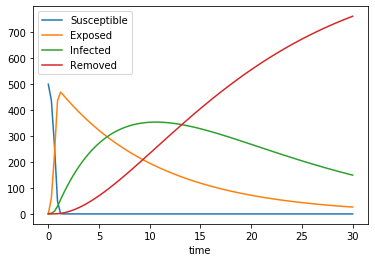

In [283]:
#Changing the infectious:
#raising the infectious time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 10.0
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [284]:
#raising the time of being infectious led to a much more gradual drop off in the number of exposed people, which dramatically
#increased the number of people who got infected (the green curve) . Why the red has no asymptote is unknown.

Text(0.5, 0, 'time')

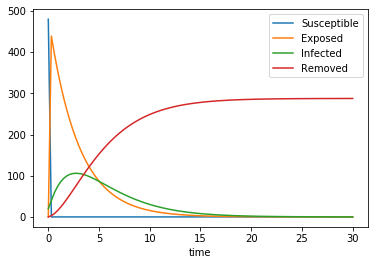

In [285]:
#Changing the number of intial infections:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 20
S0 = 480
E0 = 0
R0= 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [286]:
#raising the number of initial infections seems to have no effect on the infected or removed curves

Text(0.5, 0, 'time')

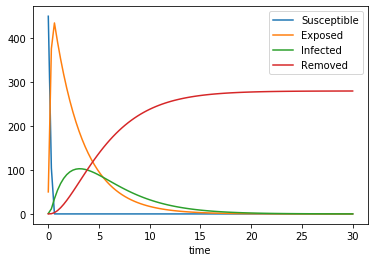

In [287]:
#raising the original exposed population
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 449
E0 = 50
R0 = 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [288]:
#raising the number of people initially exposed decreases the peak of the susceptible populatiom as well as the value
#when the removed curve stabilizes

Text(0.5, 0, 'time')

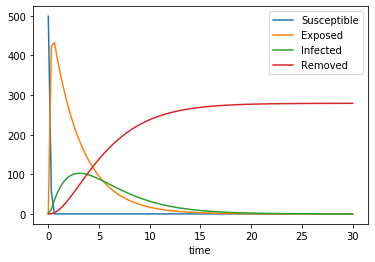

In [289]:
#increasing the reproduction number
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 5.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 1
S0 = 499
E0 = 0
R0 = 0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [275]:
#increasing the reproduction number, of how many people one person can effect, seemed only to affect the peak shape and value
#of the exposed population

# 3: Implementing the Toy Ball Simulation

In [238]:
import math
import random
import sys
import time
import pygame
from pygame.locals import *

# import time
pygame.init()
Surface = pygame.display.set_mode((800, 600))

# Create Empty lists
circleHolder = []
infectedNumber = 0
recoveredNumber = 0
t0 = 0
t1 = 0
totalTime = 0

ModuleNotFoundError: No module named 'pygame'

In [227]:
def main():
    while True:
        GetInput()
        Move()
        Draw()
        CollisionDetect()

In [229]:
class Circle:
    def __init__(self, k=0):
        self.radius = 5
        self.x = random.randint(self.radius, 800 - (2 * self.radius + 10))
        self.y = random.randint(self.radius, 600 - (2 * self.radius + 10))
        self.speedx = 0.5 * (random.random() + 2)
        self.speedy = 0.5 * (random.random() + 2)
        self.Infected = False
        self.Susceptible = False
        self.Removed = False
        self.NewColor = False
        self.FirstHit = False
        self.InfectedTime = 0

        if k == 1:
            self.Infected = True
            self.InfectedTime = time.time()

        else:
            self.Susceptible = True

for x in range(100):
    circleHolder.append(Circle(0))
for x in range(1):
    circleHolder.append(Circle(1))

NameError: name 'circleHolder' is not defined

In [231]:
#     Circle.NewColor = True
#     Circle.Infected = True

def CircleCollide(c1, c2):
    global infectedNumber

    C1Speed = math.sqrt((c1.speedx ** 2) + (c1.speedy ** 2))
    XDiff = -(c1.x - c2.x)
    YDiff = -(c1.y - c2.y)

    if XDiff > 0:
        if YDiff > 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff < 0:
        if YDiff > 0:
            Angle = 180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
        elif YDiff < 0:
            Angle = -180 + math.degrees(math.atan(YDiff / XDiff))
            XSpeed = -C1Speed * math.cos(math.radians(Angle))
            YSpeed = -C1Speed * math.sin(math.radians(Angle))
    elif XDiff == 0:
        if YDiff > 0:
            Angle = -90
        else:
            Angle = 90
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    elif YDiff == 0:
        if XDiff < 0:
            Angle = 0
        else:
            Angle = 180
        XSpeed = C1Speed * math.cos(math.radians(Angle))
        YSpeed = C1Speed * math.sin(math.radians(Angle))
    else:
        print("helllo")
        
    if (c1.Susceptible and c2.Infected) is True:
        c1.NewColor = True
        c2.NewColor = True
        c1.FirstHit = True
        c2.FirstHit = True
        c1.Susceptible = False
        c1.Infected = True
        infectedNumber = infectedNumber + 1
        print("Number of Infected: ")
        print(infectedNumber)
        c1.InfectedTime = time.time()

    elif (c1.Infected and c2.Susceptible) is True:
        c1.NewColor = True
        c2.NewColor = True
        c1.FirstHit = True
        c2.FirstHit = True
        c2.Susceptible = False
        c2.Infected = True
        infectedNumber = infectedNumber + 1
        print("Number of Infected: ")
        print(infectedNumber)
        c2.InfectedTime = time.time()

    c1.speedx = XSpeed
    c1.speedy = YSpeed
    pygame.display.flip()


In [232]:
def Move():
    for Circle in circleHolder:
        Circle.x += Circle.speedx
        Circle.y += Circle.speedy


def CollisionDetect():
    # hitting wall
    for Circle in circleHolder:
        if Circle.x < Circle.radius or Circle.x > 800 - (2 * Circle.radius + 10):
            Circle.speedx *= -1
        if Circle.y < Circle.radius or Circle.y > 600 - (2 * Circle.radius + 10):
            Circle.speedy *= -1

    # hitting each other
    for Circle in circleHolder:
        for Circle2 in circleHolder:
            if Circle != Circle2:
                if math.sqrt(((Circle.x - Circle2.x) ** 2) + ((Circle.y - Circle2.y) ** 2)) <= (
                        Circle.radius + Circle2.radius):
                    CircleCollide(Circle, Circle2)
def Draw():
    global t0
    global t1
    global totalTime
    global infectedNumber
    global recoveredNumber

    if infectedNumber == 2:
        t0 = time.time()
    if infectedNumber == 100:
        t1 = time.time()
        totalTime = t1 - t0
        print(totalTime)
        infectedNumber = 101

    for Circle in circleHolder:
        if Circle.InfectedTime > 0 and Circle.Removed == False:
            timeHolder = (time.time() - Circle.InfectedTime)
            if 14 <= timeHolder <= 15:
                Circle.Removed = True
                Circle.Infected = False
                Circle.NewColor = False
                recoveredNumber = recoveredNumber + 1
                print("Number Recovered: ")
                print(recoveredNumber)

    Surface.fill((255, 255, 255))
    for Circle in circleHolder:
        if Circle.NewColor:
            pygame.draw.circle(Surface, (150, 0, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
            # start timer for 10 seconds, when time runs out switch color to Removed.
        elif Circle.Removed:
            pygame.draw.circle(Surface, (0, 150, 0), (int(Circle.x), int(600 - Circle.y)), Circle.radius)
        else:
            pygame.draw.circle(Surface, (0, 0, 150), (int(Circle.x), int(600 - Circle.y)), Circle.radius)

    pygame.display.flip()


def GetInput():
    keystate = pygame.key.get_pressed()
    for event in pygame.event.get():
        if event.type == QUIT or keystate[K_ESCAPE]:
            pygame.quit();
            sys.exit()


if __name__ == '__main__': main()

NameError: name 'pygame' is not defined